1️⃣ Setup & Load Data

In [1]:

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import plotly.express as px

sns.set(style="whitegrid")

print("Environment ready ✅")


Environment ready ✅


🟦  2 — Load Dataset

In [2]:
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

DATA_PATH = "/kaggle/input/top-rated-movies-dataset"
df = pd.read_csv(f"{DATA_PATH}/Movies_dataset.csv")

title_col = 'original_title'
genre_col = 'genre'
rating_col = 'vote_average'

df = df.dropna(subset=[title_col, genre_col, rating_col])
df[genre_col] = df[genre_col].astype(str)
df['features'] = df[genre_col] + " " + df[rating_col].astype(str)

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['features'])
similarity_matrix = cosine_similarity(tfidf_matrix)

print("System rebuilt successfully ✅")


System rebuilt successfully ✅


🟦  3 — Dataset Overview

In [3]:
df.shape

(9997, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9997 non-null   int64  
 1   original_title     9997 non-null   object 
 2   original_language  9997 non-null   object 
 3   genre              9997 non-null   object 
 4   overview           9996 non-null   object 
 5   popularity         9997 non-null   float64
 6   vote_count         9997 non-null   int64  
 7   vote_average       9997 non-null   float64
 8   release_date       9996 non-null   object 
 9   features           9997 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 859.1+ KB


In [5]:
df.describe()

,id,popularity,vote_count,vote_average
count,9.997000e+03,9997.000000,9997.000000,9997.000000
mean,2.211738e+05,4.604015,2064.250475,6.714654
std,2.931281e+05,8.044672,3289.662133,0.672399
min,2.000000e+00,0.003300,300.000000,5.300000
25%,1.032000e+04,2.070000,473.000000,6.200000
50%,4.143600e+04,3.527900,863.000000,6.700000
75%,3.997960e+05,5.345500,2065.000000,7.200000
max,1.426776e+06,441.551500,38436.000000,8.714000


 4 — Column Mapping

In [6]:
title_col = 'original_title'
genre_col = 'genre'
rating_col = 'vote_average'
votes_col = 'vote_count'
popularity_col = 'popularity'

print(title_col, genre_col, rating_col)


original_title genre vote_average


🟦 4 — Data Cleaning & Feature Engineering

In [7]:
df = df.dropna(subset=[title_col, genre_col, rating_col])

df[genre_col] = df[genre_col].astype(str)

df['features'] = df[genre_col] + " " + df[rating_col].astype(str)

df[[title_col, genre_col, rating_col, 'features']].head()


,original_title,genre,vote_average,features
0,The Shawshank Redemption,"Drama, Crime",8.714,"Drama, Crime 8.714"
1,The Godfather,"Drama, Crime",8.686,"Drama, Crime 8.686"
2,The Godfather Part II,"Drama, Crime",8.571,"Drama, Crime 8.571"
3,Schindler's List,"Drama, History, War",8.566,"Drama, History, War 8.566"
4,12 Angry Men,Drama,8.548,Drama 8.548


****5 — TF-IDF Vectorization****

In [8]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['features'])

tfidf_matrix.shape


(9997, 1010)

****6 — Cosine Similarity Matrix****

In [9]:
similarity_matrix = cosine_similarity(tfidf_matrix)

similarity_matrix.shape

(9997, 9997)

*****7 — Recommendation Function (Content-Based)*****

In [10]:
def recommend_movies(movie_title, top_n=10):
    if movie_title not in df[title_col].values:
        return pd.DataFrame()

    idx = df[df[title_col] == movie_title].index[0]
    scores = list(enumerate(similarity_matrix[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    movie_indices = [i[0] for i in scores]
    return df.iloc[movie_indices][[title_col, genre_col, rating_col]]


****8 — Test Recommendation****

In [11]:
sample_movie = df[title_col].iloc[1]
print("Selected movie:", sample_movie)

recommend_movies(sample_movie)

Selected movie: The Godfather


,original_title,genre,vote_average
5062,The Infiltrator,"Crime, Drama, Thriller",6.686
824,The Broken Circle Breakdown,Drama,7.686
822,범죄도시,"Action, Crime, Thriller",7.686
823,조작된 도시,"Action, Thriller, Crime",7.686
9395,S.W.A.T.: Firefight,"Action, Crime, Thriller",5.686
5058,Small Things Like These,"Drama, History",6.686
5059,Akelarre,"Drama, History",6.686
826,Hiroshima mon amour,"Drama, History, Romance",7.686
23,Cidade de Deus,"Drama, Crime",8.400
224,"Three Billboards Outside Ebbing, Missouri","Crime, Drama",8.100


****9 — Matplotlib Visualization (Bar Chart)****

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

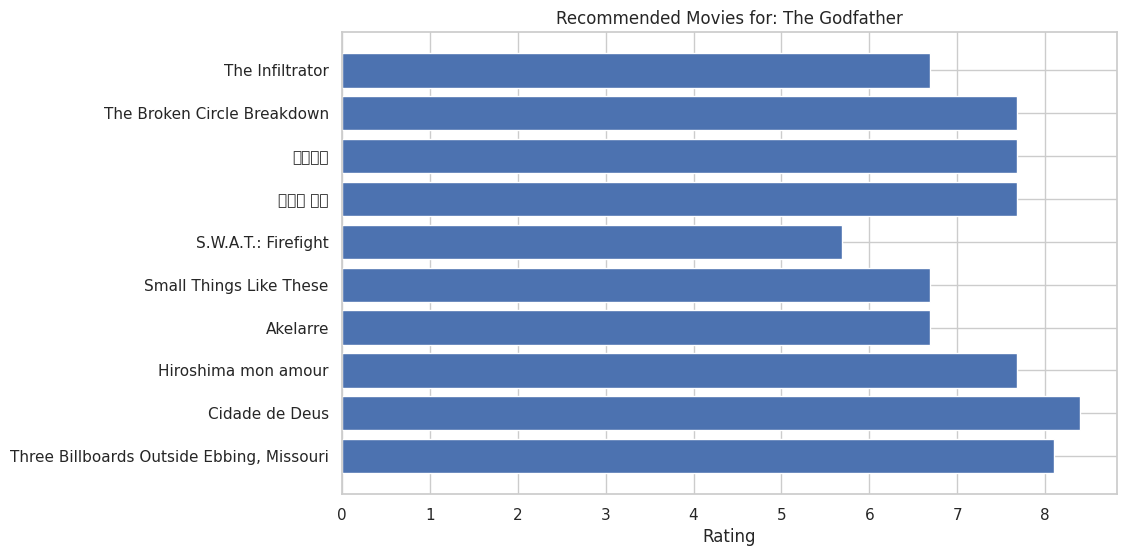

In [12]:
def plot_recommendations(movie_title):
    recs = recommend_movies(movie_title)

    plt.figure(figsize=(10,6))
    plt.barh(recs[title_col], recs[rating_col])
    plt.gca().invert_yaxis()
    plt.title(f"Recommended Movies for: {movie_title}")
    plt.xlabel("Rating")
    plt.show()

plot_recommendations(sample_movie)

****10 — Install Plotly****

In [13]:
!pip install plotly

**11 — Plotly Imports**

In [14]:
import plotly.express as px


****12 — Interactive Rating Distribution****

In [15]:
px.histogram(df, x=rating_col, nbins=20, title="Movie Ratings Distribution").show()


****13 — Interactive Votes vs Rating****

In [16]:
px.scatter(
    df,
    x=votes_col,
    y=rating_col,
    hover_name=title_col,
    color=genre_col,
    log_x=True,
    title="Votes vs Rating (Interactive)"
).show()


****14 — Interactive Recommendations (Plotly)****

In [17]:
def plotly_recommendations(movie_title):
    recs = recommend_movies(movie_title)

    fig = px.bar(
        recs,
        x=rating_col,
        y=title_col,
        orientation="h",
        color=genre_col,
        title=f"Recommendations for {movie_title}"
    )
    fig.show()
plotly_recommendations(sample_movie)

****15 — Generate Synthetic Users (for Collaborative Filtering)****

In [18]:
np.random.seed(42)

num_users = 300
ratings_data = []

for user_id in range(1, num_users + 1):
    sampled_movies = df.sample(25)
    for _, row in sampled_movies.iterrows():
        ratings_data.append([
            user_id,
            row[title_col],
            float(row[rating_col] + np.random.normal(0, 0.5))
        ])

ratings_df = pd.DataFrame(ratings_data, columns=['user_id', 'title', 'rating'])
ratings_df['rating'] = ratings_df['rating'].clip(1, 10)

ratings_df.head()


,user_id,title,rating
0,1,Chained,7.707997
1,1,Death Wish,7.293014
2,1,Law Abiding Citizen,8.771263
3,1,Skjelvet,5.968194
4,1,Ticket to Paradise,6.175983


**16 — Install Surprise Library**

In [19]:
!pip install scikit-surprise


****17 — Build User-Movie Matrix****

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

user_movie_matrix = ratings_df.pivot_table(
    index='user_id',
    columns='title',
    values='rating'
).fillna(0)

user_movie_matrix.shape


(300, 5166)

**18 — Train Model**

In [21]:
user_similarity = cosine_similarity(user_movie_matrix)


**19 — Recommendation Function**

In [22]:
def recommend_cf(user_id, top_n=10):
    user_idx = user_movie_matrix.index.get_loc(user_id)

    similarity_scores = list(enumerate(user_similarity[user_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:6]

    similar_users = [user_movie_matrix.index[i[0]] for i in similarity_scores]

    user_movies = user_movie_matrix.loc[similar_users].mean().sort_values(ascending=False)

    return user_movies.head(top_n).reset_index().rename(
        columns={'index': 'title', 0: 'predicted_rating'}
    )


**20 — Test**

In [23]:
recommend_cf(1)


,title,predicted_rating
0,Law Abiding Citizen,4.336130
1,Toy Story,1.775730
2,ドラゴンボールZ 絶望への反抗!! 残された超戦士・悟飯とトランクス,1.710378
3,Warrior,1.698681
4,Cat on a Hot Tin Roof,1.623277
5,Tell It to the Bees,1.616165
6,Kingdom of Heaven,1.598559
7,Alice Doesn't Live Here Anymore,1.580295
8,Heavenly Creatures,1.571966
9,The Lady Eve,1.571917


****21 -- Hybrid Recommendation Function****

In [24]:
def recommend_hybrid(movie_title, user_id, top_n=10, alpha=0.6):
    # Content-based
    content_recs = recommend_movies(movie_title, top_n=30)

    # Collaborative
    cf_recs = recommend_cf(user_id, top_n=30)

    # Normalize scores
    content_recs = content_recs.copy()
    content_recs['content_score'] = content_recs[rating_col] / content_recs[rating_col].max()

    cf_recs = cf_recs.copy()
    cf_recs['cf_score'] = cf_recs['predicted_rating'] / cf_recs['predicted_rating'].max()

    # Merge
    merged = pd.merge(
        content_recs,
        cf_recs,
        left_on=title_col,
        right_on='title',
        how='inner'
    )

    merged['hybrid_score'] = alpha * merged['content_score'] + (1 - alpha) * merged['cf_score']

    final_recs = merged.sort_values('hybrid_score', ascending=False).head(top_n)

    return final_recs[[title_col, genre_col, rating_col, 'hybrid_score']]


**Test Hybrid Model**

In [25]:
recommend_hybrid(sample_movie, user_id=1)


,original_title,genre,vote_average,hybrid_score


*****22 -- Dropdown Recommendation Dashboard*****

In [26]:
def interactive_movie_selector(user_id=1):
    movie_list = df[title_col].dropna().unique()[:500]

    fig = px.scatter(title="Select a movie from dropdown")

    def update_plot(movie_title):
        recs = recommend_hybrid(movie_title, user_id)

        fig = px.bar(
            recs,
            x='hybrid_score',
            y=title_col,
            orientation='h',
            color=genre_col,
            title=f"Hybrid Recommendations for '{movie_title}'"
        )
        fig.show()

    # Auto show first movie
    update_plot(movie_list[0])

    return movie_list


**Run UI**

In [27]:
movies = interactive_movie_selector(user_id=1)
movies[:10]


array(['The Shawshank Redemption', 'The Godfather',
       'The Godfather Part II', "Schindler's List", '12 Angry Men',
       '千と千尋の神隠し', 'The Dark Knight', 'दिलवाले दुल्हनिया ले जायेंगे',
       'The Green Mile', '기생충'], dtype=object)

In [28]:
plotly_recommendations(sample_movie)


In [29]:
recommend_hybrid(sample_movie, 1)


,original_title,genre,vote_average,hybrid_score


***23 -- Movie Similarity Network Graph (Visualization)*****

In [30]:
import networkx as nx

def movie_similarity_network(movie_title, top_n=10):
    recs = recommend_movies(movie_title, top_n)

    G = nx.Graph()
    G.add_node(movie_title)

    for _, row in recs.iterrows():
        G.add_node(row[title_col])
        G.add_edge(movie_title, row[title_col])

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.5, seed=42)

    nx.draw(
        G, pos,
        with_labels=True,
        node_size=1800,
        font_size=9,
        node_color="lightblue",
        edge_color="gray"
    )

    plt.title(f"Movie Similarity Network for: {movie_title}")
    plt.show()


*****24 -- Save & Load Models (TF-IDF + Similarity)*****

In [31]:
import pickle

with open("/kaggle/working/tfidf_model.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("/kaggle/working/similarity_matrix.pkl", "wb") as f:
    pickle.dump(similarity_matrix, f)

print("Models saved ✅")


Models saved ✅


**Load**

In [32]:
with open("/kaggle/working/tfidf_model.pkl", "rb") as f:
    tfidf = pickle.load(f)

with open("/kaggle/working/similarity_matrix.pkl", "rb") as f:
    similarity_matrix = pickle.load(f)

print("Models loaded ✅")


Models loaded ✅


**25 -- User Rating Input System (Dynamic personalization)**

In [33]:
def create_user_profile(user_ratings_dict):
    """
    user_ratings_dict example:
    {"Inception": 9, "Titanic": 8}
    """
    user_vector = np.zeros(len(df))

    for movie, rating in user_ratings_dict.items():
        if movie in df[title_col].values:
            idx = df[df[title_col] == movie].index[0]
            user_vector[idx] = rating

    return user_vector


**Recommend from User Ratings**

In [34]:
def recommend_from_user_profile(user_vector, top_n=10):
    scores = cosine_similarity([user_vector], similarity_matrix)[0]

    top_indices = scores.argsort()[::-1][:top_n]

    return df.iloc[top_indices][[title_col, genre_col, rating_col]]


In [35]:
user_ratings = {
    sample_movie: 9
}

profile = create_user_profile(user_ratings)
recommend_from_user_profile(profile)


,original_title,genre,vote_average
824,The Broken Circle Breakdown,Drama,7.686
1,The Godfather,"Drama, Crime",8.686
5059,Akelarre,"Drama, History",6.686
5058,Small Things Like These,"Drama, History",6.686
5062,The Infiltrator,"Crime, Drama, Thriller",6.686
9395,S.W.A.T.: Firefight,"Action, Crime, Thriller",5.686
823,조작된 도시,"Action, Thriller, Crime",7.686
822,범죄도시,"Action, Crime, Thriller",7.686
826,Hiroshima mon amour,"Drama, History, Romance",7.686
5078,The Good Liar,Crime,6.700


****26 -- Recommendation Explanation System ("Why this movie?")****

In [36]:
def explain_recommendation(base_movie, recommended_movie):
    base_row = df[df[title_col] == base_movie].iloc[0]
    rec_row = df[df[title_col] == recommended_movie].iloc[0]

    explanation = f"""
Why recommended?

Base movie: {base_movie}
- Genre: {base_row[genre_col]}
- Rating: {base_row[rating_col]}

Recommended movie: {recommended_movie}
- Genre: {rec_row[genre_col]}
- Rating: {rec_row[rating_col]}

Reason:
• Similar genre overlap
• Similar audience rating pattern
• High content similarity score
"""

    print(explanation)


In [37]:
recs = recommend_movies(sample_movie)
explain_recommendation(sample_movie, recs.iloc[0][title_col])



Why recommended?

Base movie: The Godfather
- Genre: Drama, Crime
- Rating: 8.686

Recommended movie: The Infiltrator
- Genre: Crime, Drama, Thriller
- Rating: 6.686

Reason:
• Similar genre overlap
• Similar audience rating pattern
• High content similarity score

